# Anna Clara de Andrada

## What are the main factors that help determine a country's happiness score?

### As an international student from Brazil who has also lived in Canada and in the United States during the past 3 years, I am very interested in such dynamics. Does financial prosperity or governmental support play a role on the average citizen's life satisfaction? Lately, the idea that a functioning market brings happiness to all is coming into scrutiny as prices skyrocket and as populations start demanding more government support. It is of personal interest to observe this relationship so that we can understand what policies support a prosperous and happy society, and which ones don't. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df1 = pd.read_csv('../data/raw/world_happiness_report.csv')

print(df1)


      Unnamed: 0  Happiness Rank      Country  \
0              0               1  Switzerland   
1              1               2      Iceland   
2              2               3      Denmark   
3              3               4       Norway   
4              4               5       Canada   
...          ...             ...          ...   
1224         141             142    Botswana*   
1225         142             143      Rwanda*   
1226         143             144     Zimbabwe   
1227         144             145      Lebanon   
1228         145             146  Afghanistan   

                               Region Happiness Score  \
0                      Western Europe           7.587   
1                      Western Europe           7.561   
2                      Western Europe           7.527   
3                      Western Europe           7.522   
4                       North America           7.427   
...                               ...             ...   
1224        

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

number_of_rows_and_columns = df1.shape
first_five_rows = df1.head()
column_names = df1.columns


print(number_of_rows_and_columns)
print(first_five_rows)
print(column_names)


(1229, 12)
   Unnamed: 0  Happiness Rank      Country          Region Happiness Score  \
0           0               1  Switzerland  Western Europe           7.587   
1           1               2      Iceland  Western Europe           7.561   
2           2               3      Denmark  Western Europe           7.527   
3           3               4       Norway  Western Europe           7.522   
4           4               5       Canada   North America           7.427   

  Economy (GDP per Capita) Family (Social Support) Health (Life Expectancy)  \
0                  1.39651                 1.34951                  0.94143   
1                  1.30232                 1.40223                  0.94784   
2                  1.32548                 1.36058                  0.87464   
3                    1.459                 1.33095                  0.88521   
4                  1.32629                 1.32261                  0.90563   

   Freedom Trust (Government Corruption) Gene

In [ ]:
unique_values = df1.nunique(axis=0)
print(unique_values)

'''this output showcases that the survey includes data for all countries (158 unique values
under 'Countries') in the international arena over a span of 8 years'''

Unnamed: 0                        158
Happiness Rank                    158
Country                           195
Region                             17
Happiness Score                  1131
Economy (GDP per Capita)         1150
Family (Social Support)          1133
Health (Life Expectancy)         1080
Freedom                          1053
Trust (Government Corruption)     952
Generosity                        979
Year                                8
dtype: int64


"this output showcases that the survey includes data for all countries (158 unique values\nunder 'Countries') in the international arena over a span of 8 years"

In [ ]:
print(df1['Country'].unique())

print(df1['Region'].unique())

''' to show which countries and regions are being analyzed. 
This showcases that there are some countries that are assigned a '*', and some 
regions are null: '-'

'''

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

" to show which countries and regions are being analyzed. \nThis showcases that there are some countries that are assigned a '*', and some \nregions are null: '-'\n\n"

In [ ]:
print(df1['Year'].unique())

'''This analysis showcases the timespan for which we can analyze trends'''

[2015 2016 2017 2018 2019 2020 2021 2022]


'This analysis showcases the timespan for which we can analyze trends'

In [ ]:
check_nan = df1.isnull().values.any()
print(check_nan)

''' to ensure there are no NaN values in our dataset to be cleaned'''

False


' to ensure there are no NaN values in our dataset to be cleaned'

In [ ]:
df1= df1.drop(df1.columns[0], axis=1)
print(df1.shape)

'''to drop Unnamed column and ensure the column has been deleted'''

(1229, 11)


'to drop Unnamed column and ensure the column has been deleted'

In [ ]:
df2 = df1[df1.Year != 2022]
df2

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
1078,145,Lesotho,Sub-Saharan Africa,3.512,0.451,0.731,0.007,0.405,0.015,0.103,2021
1079,146,Botswana,Sub-Saharan Africa,3.467,1.099,0.724,0.34,0.539,0.088,0.027,2021
1080,147,Rwanda,Sub-Saharan Africa,3.415,0.364,0.202,0.407,0.627,0.493,0.227,2021
1081,148,Zimbabwe,Sub-Saharan Africa,3.145,0.457,0.649,0.243,0.359,0.075,0.157,2021


In [ ]:
df2["Happiness Score"].dropna().astype(float)

0       7.587
1       7.561
2       7.527
3       7.522
4       7.427
        ...  
1078    3.512
1079    3.467
1080    3.415
1081    3.145
1082    2.523
Name: Happiness Score, Length: 1083, dtype: float64

In [ ]:
df2["Happiness Score"]=df2["Happiness Score"].dropna().astype(float)
df2["Economy (GDP per Capita)"]=df2["Economy (GDP per Capita)"].dropna().astype(float)
df2["Family (Social Support)"]=df2["Family (Social Support)"].dropna().astype(float)
df2["Health (Life Expectancy)"]=df2["Health (Life Expectancy)"].dropna().astype(float)
df2["Freedom"]=df2["Freedom"].dropna().astype(float)
df2["Trust (Government Corruption)"]=df2["Trust (Government Corruption)"].dropna().astype(float)

<ipython-input-32-e27f14c280e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Happiness Score"]=df2["Happiness Score"].dropna().astype(float)
<ipython-input-32-e27f14c280e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Economy (GDP per Capita)"]=df2["Economy (GDP per Capita)"].dropna().astype(float)
<ipython-input-32-e27f14c280e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
df2.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Year
count,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000,1083.000000
mean,78.003693,5.412204,0.916687,1.050359,0.611036,0.430679,0.127517,2017.968606
std,44.752183,1.118346,0.401499,0.332085,0.248725,0.152705,0.108029,1.996516
min,1.000000,2.523000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,39.000000,4.571000,0.612965,0.835440,0.436392,0.331000,0.055000,2016.000000
50%,78.000000,5.384300,0.982019,1.082680,0.643680,0.449000,0.093000,2018.000000
75%,117.000000,6.207250,1.237500,1.310832,0.799645,0.552420,0.160825,2020.000000
max,158.000000,7.842000,1.870766,1.644000,1.141000,0.724000,0.551910,2021.000000


#### The dataset being analyzed contains 11 columns, 8 of which are numeric. It lays out information regarding each country's (and their respective region's) economic strength (measured as GDP per capita), their population's life expectancy, freedom, trust in the government, happiness score and their happines rank. The happiness score index is determined by a survey conducted by the Gallup World Poll utilizing a benchmark set by the United Nations' Sustainable Development Solutions Network in order to capture the " important context that GDP does not explain: how people feel about their lives and what's happening in them." Furthermore, this dataset is extensive so that it captures this information in a large timespan: from 2015 to 2022. This gives us the opportunity to analyze how such trends changed throughout the years. 

#### This dataset's domain is CC0: Public Domain, and it was retrieved from https://www.kaggle.com/datasets/mayzannilarthein44/world-happiness-report-2015-to-2022. 

#### The purpose of this dataset is multifaceted: it is extremely informative and it can be used for a variety of purposes, including but not limited to accountability ("exposing" the countries that offer their citizens the best and poorest living conditions) and policy making purposes (by observing which countries consistently rank as the highest in happiness, policy makers can conclude which factors may contribute to greater life satisfaction)

In [ ]:
df2

,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
1078,145,Lesotho,Sub-Saharan Africa,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,0.103,2021
1079,146,Botswana,Sub-Saharan Africa,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,0.027,2021
1080,147,Rwanda,Sub-Saharan Africa,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,0.227,2021
1081,148,Zimbabwe,Sub-Saharan Africa,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,0.157,2021


In [ ]:
type(df2['Happiness Score'].loc[0])

numpy.float64

Text(0.5, 1.0, 'Correlation between numeric variables in dataset')

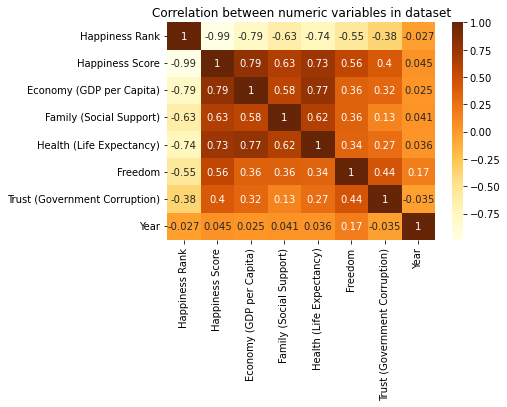

In [ ]:
df3= df2.drop(['Country','Region'],axis=1)
dr = df3.copy()
data_raw_mx = df3.corr()
sns.heatmap(data_raw_mx, annot=True, cmap='YlOrBr')
plt.title("Correlation between numeric variables in dataset")


##### this visulization does a great job at pinpointing some of the strongest correlations in our dataset. One of the strongest corelations, at 0.79, is between GDP per capita and happiness score 

In [ ]:
df2.to_csv('../data/processed/world_happiness_report_processed_Notebook1.csv')
'''to save cleaned dataset into processed folder'''

'to save cleaned dataset into processed folder'

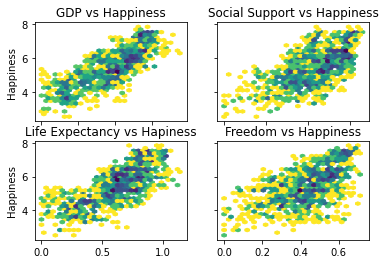

In [ ]:
x1=df3["Economy (GDP per Capita)"]
y1=df3["Happiness Score"]
x2=df3["Family (Social Support)"]
y2=df3["Happiness Score"]
x3=df3["Health (Life Expectancy)"]
y3=df3["Happiness Score"]
x4=df3["Freedom"]
y4=df3["Happiness Score"]

fig, axs = plt.subplots(2, 2)
axs[0, 0].hexbin(x1, y1, gridsize=30, bins='log', cmap='viridis_r',mincnt=1)
axs[0, 0].set_title('GDP vs Happiness')
axs[0, 1].hexbin(x2, y2, gridsize=30, bins='log', cmap='viridis_r',mincnt=1)
axs[0, 1].set_title('Social Support vs Happiness')
axs[1, 0].hexbin(x3, y3, gridsize=30, bins='log', cmap='viridis_r',mincnt=1)
axs[1, 0].set_title('Life Expectancy vs Hapiness')
axs[1, 1].hexbin(x4, y4 , gridsize=30, bins='log', cmap='viridis_r',mincnt=1)
axs[1, 1].set_title('Freedom vs Happiness')

for ax in axs.flat:
    ax.set(ylabel="Happiness")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#### these four plots were showcased together as they share the same y-axis: "Happiness Score". As observed in the correlation matrix: GDP, Social Support, Life expectancy and Freedom were the 4 variables that showcased the strongest correlation to Happiness Score. This visualization reinforces the information in the correlation matrix, as the graph showcasing the relationship between GDP and Happiness has the strongest linear positive correlation with the fewest outliers.


In [ ]:
x1=df3["Happiness Score"]
y1=df3["Economy (GDP per Capita)"]
       
sns.displot(data=df4,x=x1, y=y1,kind='kde',cmap='Reds').set(title='Happiness vs GDP')



NameError: name 'df4' is not defined

#### this visulization analyzes the joint distribution of Happiness and GDP. From this plot, we can determine that the most regular correlations observed between these two variables occur when the happiness score is approximately between 5 - 6.25 and the GDP per capita is between 1 - 1.7

#### As we have seen, GDP and Happiness is the relationship that presents the strongest positive correlation. The following graph presented below goes one step further and does a great job at showcasing that strong linear correlation between GDP and Happiness

In [ ]:
sns.barplot(x=df3['Happiness Score'], y=df3['Economy (GDP per Capita)'], data=df3, 
            errorbar=None, palette='flare').set(title="Relationship Between GDP and Happiness",xticklabels=[])
'''As we have seen, GDP and Happiness is the relationship that presents the strongest positive correlation. This graph goes one step further and does a great job at showcasing that strong linear correlation between GDP and Happiness'''

In [ ]:
sns.jointplot(x= 'Happiness Score',kind ='reg',color='navy', y ='Economy (GDP per Capita)',data =df3)
  

#### this graph not only showcases the correlation between our two variables, but it also showcass the distribution of each variable, which follows a relatively similar trend -- a symmetrical distribution as opposed to a skewed one

In [ ]:
import pandas as pd
import numpy as np 

def load_and_process(url_or_path_to_csv_file):


    dfa = (
        pd.read_csv(url_or_path_to_csv_file))
         
    dfb = dfa[dfa.Freedom.notnull()]
    dfc = dfb.drop(columns=dfb.columns[0])
    dfd = dfc[dfc.Year != 2022]
    dfe = dfd.astype({'Happiness Score':'float'})
    dff = dfe.astype({'Economy (GDP per Capita)':'float'})
    dfg = dff.astype({'Family (Social Support)':'float'})
    dfh = dfg.astype({'Health (Life Expectancy)':'float'})
    dfi = dfh.astype({'Freedom':'float'})
    dfj = dfi.astype({'Trust (Government Corruption)':'float'})
    dfk = dfj.astype({'Generosity':'float'})
    # Make sure to return the latest dataframe
    return dfk

In [ ]:
load_and_process('../data/raw/world_happiness_report.csv')



,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...
1078,145,Lesotho,Sub-Saharan Africa,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,0.10300,2021
1079,146,Botswana,Sub-Saharan Africa,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,0.02700,2021
1080,147,Rwanda,Sub-Saharan Africa,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,0.22700,2021
1081,148,Zimbabwe,Sub-Saharan Africa,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,0.15700,2021


#### Now my dataset is completely clean and ready to analyze! Note that I took a slighty different approach to cleaning my dataset inside this function. Rather than dropping all rows correspoding to 2022, I chose to drop all rows with NaN values in a given numeric column, which has the same effect

In [ ]:
from project_functions1 import load_and_process # This is called a relative import
df = load_and_process('../data/raw/world_happiness_report.csv')
df

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...
1078,145,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,0.10300,2021
1079,146,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,0.02700,2021
1080,147,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,0.22700,2021
1081,148,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,0.15700,2021
